# Aspect-based SA


In [1]:
!pip install nltk pymorphy2

     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 8.2 MB 8.0 MB/s 


In [2]:
import pandas as pd

In [3]:
!pip install -U 'scikit-learn<0.24'

     |████████████████████████████████| 6.8 MB 4.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [4]:
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/train_aspects.txt
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/train_reviews.txt
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/dev_aspects.txt
!wget https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/dev_reviews.txt

--2021-12-27 20:59:42--  https://github.com/named-entity/hse-nlp/raw/master/4th_year/Project/train_aspects.txt
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/named-entity/hse-nlp/master/4th_year/Project/train_aspects.txt [following]
--2021-12-27 20:59:43--  https://raw.githubusercontent.com/named-entity/hse-nlp/master/4th_year/Project/train_aspects.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228391 (223K) [text/plain]
Saving to: ‘train_aspects.txt’

train_aspects.txt   100%[===================>] 223.04K  --.-KB/s    in 0.03s   

2021-12-27 20:59:43 (6.44 MB/s) - ‘train_aspects.txt’ save

In [5]:
train_asp = pd.read_csv(
    'train_aspects.txt', 
    delimiter='\t', 
    names=['text_id', 'category', 'mention', 'start', 'end', 'sentiment']
)
train_texts = pd.read_csv('train_reviews.txt', delimiter='\t', names=['text_id','text'])

In [6]:
test_asp = pd.read_csv(
    'dev_aspects.txt', 
    delimiter='\t', 
    names=['text_id', 'category', 'mention', 'start', 'end', 'sentiment']
)
test_texts = pd.read_csv('dev_reviews.txt', delimiter='\t', names=['text_id','text'])

In [7]:
from nltk.tokenize import RegexpTokenizer
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()
token = RegexpTokenizer('\w+')

def normalize(text):
    words = [morph.parse(word)[0].normal_form for word in tokenize(text) if word]
    return words

def tokenize(text):
    return token.tokenize(text)

In [8]:
train_asp.head(3)

,text_id,category,mention,start,end,sentiment
0,3976,Whole,ресторане,71,80,neutral
1,3976,Whole,ресторанах,198,208,neutral
2,3976,Whole,ресторане,256,265,neutral


In [9]:
train_texts.head(3)

,text_id,text
0,3976,"День 8-го марта прошёл, можно и итоги подвести..."
1,30808,Отмечали в этом ресторане день рождение на пер...
2,14031,Хочу поделиться своим впечатлением от посещени...


In [13]:
train_asp.value_counts(subset=['mention', 'category'])

mention                  category
ресторан                 Whole       100
место                    Whole        97
обслуживание             Service      96
интерьер                 Interior     87
ресторане                Whole        75
                                    ... 
пирожными                Food          1
пирожок к первому блюду  Food          1
пицц                     Food          1
пиццами                  Food          1
 Цезарь                  Food          1
Length: 1955, dtype: int64

In [15]:
train_asp['lemmas'] = [tuple(normalize(text)) for text in train_asp['mention']]

In [16]:
train_asp

,text_id,category,mention,start,end,sentiment,lemmas
0,3976,Whole,ресторане,71,80,neutral,"(ресторан,)"
1,3976,Whole,ресторанах,198,208,neutral,"(ресторан,)"
2,3976,Whole,ресторане,256,265,neutral,"(ресторан,)"
3,3976,Service,Столик бронировали,267,285,neutral,"(столик, бронировать)"
4,3976,Service,администратор,322,335,positive,"(администратор,)"
...,...,...,...,...,...,...,...
4758,16630,Service,обслуживание,85,97,positive,"(обслуживание,)"
4759,16630,Food,Еда,99,102,positive,"(еда,)"
4760,16630,Service,персоналу,244,253,positive,"(персонал,)"
4761,16630,Whole,ресторан,294,302,positive,"(ресторан,)"


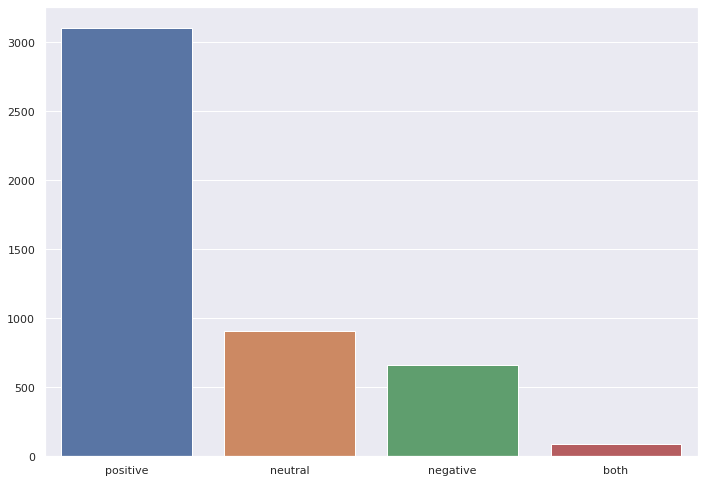

In [56]:
import seaborn as sns
from collections import Counter
import matplotlib as plt
c = train_asp.sentiment.value_counts().to_dict()
xs = []
ys = []
for key, value in c.items():
  if key != 'O':
    xs.append(key)
    ys.append(value)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(
    x=xs, 
    y=ys)

In [17]:
train_asp.value_counts(subset=['lemmas', 'category'])

lemmas                     category
(ресторан,)                Whole       255
(обслуживание,)            Service     168
(интерьер,)                Interior    166
(официант,)                Service     143
(кухня,)                   Food        135
                                      ... 
(предварительный, заказ)   Service       1
(появляться,)              Service       1
(появиться,)               Service       1
(поступить,)               Service       1
(1450, 1750р, с, человек)  Price         1
Length: 1336, dtype: int64

In [18]:
!pip install stanza

     |████████████████████████████████| 432 kB 4.1 MB/s 
     |████████████████████████████████| 170 kB 47.8 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=5f82caec05d0dfcf392aaf4ff50e5d03de9e596ee91fd1b4fd153e2e4c2f91d9
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [19]:
import stanza

In [20]:
stanza.download('ru')

2021-12-27 21:00:25 INFO: Downloading default packages for language: ru (Russian)...


2021-12-27 21:00:46 INFO: Finished downloading models and saved to /root/stanza_resources.


In [21]:
# nlp = stanza.Pipeline('ru', processors='tokenize')
nlp = stanza.Pipeline('ru', processors='tokenize,pos')

2021-12-27 21:00:46 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |

2021-12-27 21:00:46 INFO: Use device: cpu
2021-12-27 21:00:46 INFO: Loading: tokenize
2021-12-27 21:00:46 INFO: Loading: pos
2021-12-27 21:00:47 INFO: Done loading processors!


In [22]:
reviews = {}
with open('train_reviews.txt') as f:
  for line in f:
    line = line.rstrip('\r\n').split('\t')
    reviews[line[0]] = line[1]


reviews_test = {}
with open('dev_reviews.txt') as f:
  for line in f:
    line = line.rstrip('\r\n').split('\t')
    reviews_test[line[0]] = line[1]

In [23]:
from collections import defaultdict
aspects = defaultdict(list)

In [24]:
with open('train_aspects.txt') as f:
  for line in f:
    line = line.rstrip('\r\n').split('\t')
    keys = ('category', 'mention', 'start', 'end', 'sentiment')
    # ['text_id', 'category', 'mention', 'start', 'end', 'sentiment']
    # тут можно отдельно запомнить начало и конец каждого упоминания
    aspects[line[0]].append(dict(zip(keys, line[1:])))

In [25]:
aspects_test = defaultdict(list)
with open('dev_aspects.txt') as f:
  for line in f:
    line = line.rstrip('\r\n').split('\t')
    keys = ('category', 'mention', 'start', 'end', 'sentiment')
    # ['text_id', 'category', 'mention', 'start', 'end', 'sentiment']
    # тут можно отдельно запомнить начало и конец каждого упоминания
    aspects_test[line[0]].append(dict(zip(keys, line[1:])))

In [26]:
all_data_train = []
for text_id, text in reviews.items():
  processed = nlp(text)
  for token in processed.iter_tokens():
    add = False
    for mention in aspects[text_id]:
      if token.start_char == int(mention['start']) and token.end_char == int(mention['end']):
        all_data_train.append([text_id, token.text, token.words[0].pos, 'B-'+mention['category']])
        add = True
      elif token.start_char > int(mention['start']) and token.end_char <= int(mention['end']):
        all_data_train.append([text_id, token.text, token.words[0].pos, 'I-'+mention['category']])
        add = True
    if not add:
      all_data_train.append([text_id, token.text,  token.words[0].pos, 'O'])

In [27]:
text_ids_train = []
texts_train = []
pos_tags_train = []
bio_tags_train = []

for el in all_data_train:
  text_ids_train.append(el[0])
  texts_train.append(el[1])
  pos_tags_train.append(el[2])
  bio_tags_train.append(el[3])


In [28]:
all_data_test = []
for text_id, text in reviews_test.items():
  processed = nlp(text)
  for token in processed.iter_tokens():
    add = False
    for mention in aspects[text_id]:
      if token.start_char == int(mention['start']) and token.end_char == int(mention['end']):
        all_data_test.append([text_id, token.text, token.words[0].pos, 'B-'+mention['category']])
        add = True
      elif token.start_char > int(mention['start']) and token.end_char <= int(mention['end']):
        all_data_test.append([text_id, token.text, token.words[0].pos, 'I-'+mention['category']])
        add = True
    if not add:
      all_data_test.append([text_id, token.text,  token.words[0].pos, 'O'])

In [29]:
text_ids_test = []
texts_test = []
pos_tags_test = []
bio_tags_test = []

for el in all_data_test:
  text_ids_test.append(el[0])
  texts_test.append(el[1])
  pos_tags_test.append(el[2])
  bio_tags_test.append(el[3])


In [30]:
len(text_ids_test)

11827

## CRF

Популярный алгоритм для разметки последовательностей. Попробуем сначала на задаче NER с помощью [sklearn-crfsuite](https://sklearn-crfsuite.readthedocs.io/en/latest/api.html)

Возьмём корпус WikiNER:

In [ ]:
!pip install -U 'scikit-learn<0.24'

Посмотрим на разметку:

# **Обучение CRF**

In [34]:
!pip install sklearn-crfsuite

     |████████████████████████████████| 743 kB 5.1 MB/s 


In [35]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

Заведём экстрактор признаков и тегов:

In [36]:
train_sen = []
new = []
for elem in range(len(text_ids_train)):
  id = text_ids_train[elem]
  try:
    if id == text_ids_train[elem+1]:
      new.append((texts_train[elem], pos_tags_train[elem], bio_tags_train[elem]))
    else:  
      new.append((texts_train[elem], pos_tags_train[elem], bio_tags_train[elem]))
      train_sen.append(new)
      new = []
  except:
    id = text_ids_train[-1]
    new = []
    for k in range(len(text_ids_train)):
      if text_ids_train[k] == id:
        new.append((texts_train[k], pos_tags_train[k], bio_tags_train[k]))
    train_sen.append(new)

In [37]:
test_sen = []
new = []
for elem in range(len(text_ids_test)):
  id = text_ids_test[elem]
  try:
    if id == text_ids_test[elem+1]:
      new.append((texts_test[elem], pos_tags_test[elem], bio_tags_test[elem]))
    else:  
      new.append((texts_test[elem], pos_tags_test[elem], bio_tags_test[elem]))
      test_sen.append(new)
      new = []
  except:
    id = text_ids_test[-1]
    new = []
    for k in range(len(text_ids_test)):
      if text_ids_test[k] == id:
        new.append((texts_test[k], pos_tags_test[k], bio_tags_test[k]))
    test_sen.append(new)

In [38]:
def word2features(sent, i):
    # достаёт фичи для i-го токена в предложении
    word = sent[i][0]
    postag = sent[i][1]
    
    features = {
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
        })
    else:
        features['BOS'] = True
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True
                
    return features


def sent2features(sent):
    # достаёт фичи для всех токенов в предложении
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [39]:
X_train = [sent2features(s) for s in train_sen]
y_train = [sent2labels(s) for s in train_sen]

X_test = [sent2features(s) for s in test_sen]
y_test = [sent2labels(s) for s in test_sen]

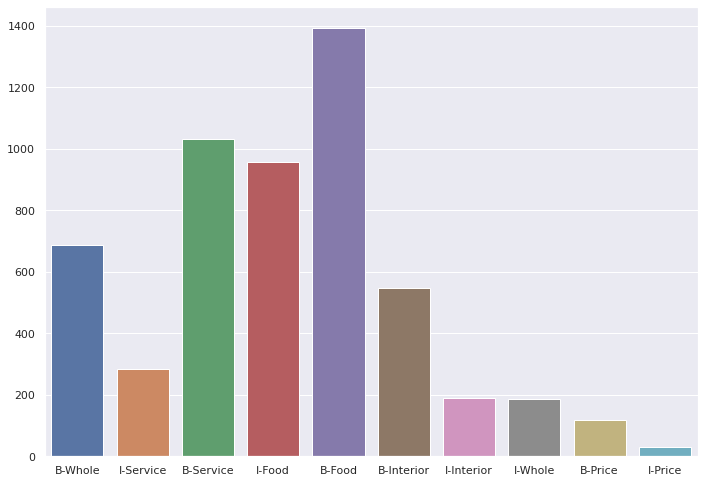

In [ ]:
import seaborn as sns
from collections import Counter
import matplotlib as plt
y_train_ext = []
for k in y_train:
  y_train_ext.extend(k)
ys_counts = Counter(y_train_ext)

xs = []
ys = []
for key, value in ys_counts.items():
  if key != 'O':
    xs.append(key)
    ys.append(value)


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(
    x=xs, 
    y=ys)

In [ ]:
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    c1=0.1, 
    c2=0.1, 
    max_iterations=100, 
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

In [ ]:
labels = list(crf.classes_)
labels.remove('O')
y_pred = crf.predict(X_test)
metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels)

0.928471296931425

In [ ]:
sorted_labels = sorted(
    labels, 
    key=lambda name: (name[1:], name[0])
)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['B-Food', 'I-Food', 'B-Interior', 'I-Interior', 'B-Price', 'I-Price', 'B-Service', 'I-Service', 'B-Whole', 'I-Whole'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


              precision    recall  f1-score   support

      B-Food      0.896     0.953     0.924       317
      I-Food      0.974     0.945     0.959       273
  B-Interior      0.992     0.874     0.930       151
  I-Interior      0.812     0.897     0.852        29
     B-Price      0.935     1.000     0.967        29
     I-Price      1.000     0.909     0.952        11
   B-Service      0.957     0.882     0.918       280
   I-Service      0.896     0.811     0.851        74
     B-Whole      0.920     0.938     0.929       160
     I-Whole      1.000     0.958     0.979        48

   micro avg      0.939     0.918     0.929      1372
   macro avg      0.938     0.917     0.926      1372
weighted avg      0.941     0.918     0.928      1372



Несмотря на дисбаланс классов, с высоким Ф-скором видим performance модели.

In [ ]:
labels = list(crf.classes_)
labels.remove('O')
y_pred = crf.predict(X_test)
metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels)

0.928471296931425

## + Подбор лучших гиперпараметров

In [40]:
from itertools import chain

import nltk
import sklearn
import scipy.stats
from sklearn.metrics import make_scorer
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

In [ ]:
%%time
# define fixed parameters and parameters to search
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search - рандомизированный, чтобы колаб не отвалился
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 21.6min finished


CPU times: user 16min 5s, sys: 3.52 s, total: 16min 8s
Wall time: 21min 47s


In [ ]:
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

best params: {'c1': 0.3196504797629, 'c2': 0.00034474520532276035}
best CV score: 0.6324798059218001
model size: 0.46M


In [ ]:
crf = rs.best_estimator_
y_pred = crf.predict(X_test)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

              precision    recall  f1-score   support

      B-Food      0.919     0.962     0.940       317
      I-Food      0.974     0.960     0.967       273
  B-Interior      0.993     0.934     0.962       151
  I-Interior      0.806     0.862     0.833        29
     B-Price      1.000     1.000     1.000        29
     I-Price      1.000     0.818     0.900        11
   B-Service      0.970     0.911     0.939       280
   I-Service      0.917     0.892     0.904        74
     B-Whole      0.922     0.956     0.939       160
     I-Whole      1.000     0.958     0.979        48

   micro avg      0.950     0.941     0.945      1372
   macro avg      0.950     0.925     0.936      1372
weighted avg      0.951     0.941     0.946      1372



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['B-Food', 'I-Food', 'B-Interior', 'I-Interior', 'B-Price', 'I-Price', 'B-Service', 'I-Service', 'B-Whole', 'I-Whole'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [51]:
labels.extend('O')

In [48]:
crf = rs.best_estimator_
y_pred = crf.predict(X_test)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

              precision    recall  f1-score   support

      B-Food      0.919     0.962     0.940       317
      I-Food      0.974     0.960     0.967       273
  B-Interior      0.993     0.934     0.962       151
  I-Interior      0.806     0.862     0.833        29
     B-Price      1.000     1.000     1.000        29
     I-Price      1.000     0.818     0.900        11
   B-Service      0.970     0.911     0.939       280
   I-Service      0.917     0.892     0.904        74
     B-Whole      0.922     0.956     0.939       160
     I-Whole      1.000     0.958     0.979        48

   micro avg      0.950     0.941     0.945      1372
   macro avg      0.950     0.925     0.936      1372
weighted avg      0.951     0.941     0.946      1372



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['B-Food', 'I-Food', 'B-Interior', 'I-Interior', 'B-Price', 'I-Price', 'B-Service', 'I-Service', 'B-Whole', 'I-Whole'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


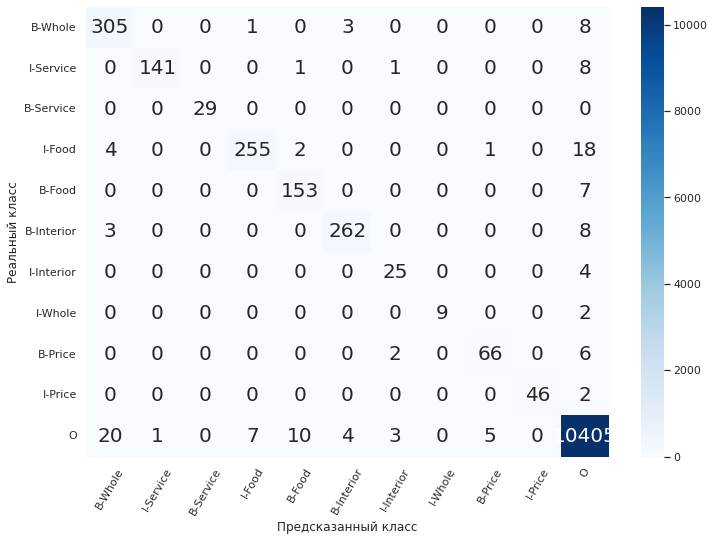

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot  as plt
ytrue = []
for k in y_test:
  ytrue.extend(k)

ypreds = []
for k in y_pred:
  ypreds.extend(k)

plt.figure()
array=confusion_matrix(ytrue, ypreds)
a = labels
df_cm = pd.DataFrame(array, index=a, columns=a)
sn.set(font_scale=1.0)
sn.heatmap(df_cm, annot=True, annot_kws={'size':20}, cmap='Blues', fmt="d")
plt.xticks(rotation=60)
plt.xlabel('Предсказанный класс')
plt.ylabel('Реальный класс')
plt.savefig('image_all.png')
plt.show()

In [58]:
crf_preds = []
for i in y_pred:
   crf_preds.extend(i)

In [70]:
y_trues = []
for i in y_test:
  y_trues.extend(i)

In [88]:
num_errors = 0
for i, pred in enumerate(crf_preds):
  if pred != y_trues[i]:
    num_errors += 1
    print(pred, ' ---', y_trues[i])

I-Service  --- O
O  --- B-Whole
O  --- B-Service
O  --- B-Service
B-Food  --- B-Service
O  --- B-Service
O  --- B-Service
O  --- B-Whole
B-Food  --- O
B-Service  --- O
B-Food  --- O
O  --- B-Interior
I-Interior  --- I-Service
I-Interior  --- I-Service
B-Service  --- O
O  --- B-Food
B-Food  --- O
I-Food  --- O
B-Food  --- O
B-Food  --- O
B-Food  --- O
O  --- B-Interior
B-Whole  --- O
B-Whole  --- O
O  --- B-Food
B-Service  --- O
O  --- B-Service
B-Service  --- O
O  --- I-Price
O  --- I-Price
O  --- I-Food
O  --- I-Food
O  --- B-Whole
O  --- B-Service
O  --- B-Service
O  --- I-Service
B-Food  --- O
O  --- I-Service
B-Food  --- O
I-Interior  --- O
B-Whole  --- B-Service
I-Food  --- O
I-Food  --- B-Food
B-Food  --- O
O  --- B-Food
O  --- B-Service
O  --- I-Service
I-Food  --- B-Food
O  --- B-Food
O  --- B-Whole
I-Food  --- O
B-Food  --- O
O  --- B-Interior
B-Food  --- I-Food
B-Food  --- O
B-Service  --- O
I-Service  --- O
B-Food  --- B-Service
B-Food  --- O
O  --- B-Interior
B-Service  ---

In [82]:
all_ok = [k for k in crf_preds if k !='O']
print(f'Errors - {num_errors}, Correctly predicted - {len(all_ok) - num_errors}')

Errors - 131, Correctly predicted - 1228


In [61]:
with open('dev_pred_aspects_1.txt', 'w')as f:
  for k in range(len(crf_preds)):

      f.write('\t'.join([text_ids_test[k], texts_test[k], crf_preds[k]]) + '\n')



In [69]:
with open('dev_pred_aspects_ans.txt', 'w')as f:
  i = 0
  while i < (len(crf_preds)) - 1:
    if crf_preds[i] == 'O':
      f.write('\t'.join([text_ids_test[i], texts_test[i], crf_preds[i]]) + '\n')
      i += 1
     
    else:
      plus = 0
      dom = crf_preds[i].split('-')[-1]
      while dom in crf_preds[i+plus]:
        plus +=1
      f.write('\t'.join([text_ids_test[i], ' '.join(texts_test[i:i+plus]), dom]) + '\n')
      i += plus